Using pypit's coadder with values of cr_nsig=7 and 3 to compare effectiveness of CR removal.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import h5py
import os
from astropy.io import fits
from astropy.convolution import convolve, Box1DKernel

In [2]:
#Song's function for importing hdf5 data
def load_spec_kast_hdf5(hdf5_file):
    hdf5_data = h5py.File(hdf5_file, 'r')
    hdf5_key = hdf5_data.keys()[0]
    hdf5_spec = hdf5_data[hdf5_key][0]
    
    return hdf5_spec[0], hdf5_spec[1], hdf5_spec[2]

In [36]:
# Read in data with the default sigma (7)
kast_1_default = 'J1617+4232_coadd_def.hdf5'
wav1_def, flux1_def, err1_def = load_spec_kast_hdf5('J1617+4232_coadd_def.hdf5')
kast_2_default = 'J1620+4227_coadd_def.hdf5'
wav2_def, flux2_def, err2_def = load_spec_kast_hdf5('J1620+4227_coadd_def.hdf5')
kast_3_default = 'J2223+0137_coadd_def.hdf5'
wav3_def, flux3_def, err3_def = load_spec_kast_hdf5('J2223+0137_coadd_def.hdf5')
kast_4_default = 'J2240+0053_coadd_def.hdf5'
wav4_def, flux4_def, err4_def = load_spec_kast_hdf5('J2240+0053_coadd_def.hdf5')

# Read in data with the value of sigma=3
kast_1_default = 'J1617+4232_coadd.hdf5'
wav1, flux1, err1 = load_spec_kast_hdf5('J1617+4232_coadd.hdf5')
kast_2_default = 'J1620+4227_coadd.hdf5'
wav2, flux2, err2 = load_spec_kast_hdf5('J1620+4227_coadd.hdf5')
kast_3_default = 'J2223+0137_coadd.hdf5'
wav3, flux3, err3 = load_spec_kast_hdf5('J2223+0137_coadd.hdf5')
kast_4_default = 'J2240+0053_coadd.hdf5'
wav4, flux4, err4 = load_spec_kast_hdf5('J2240+0053_coadd.hdf5')

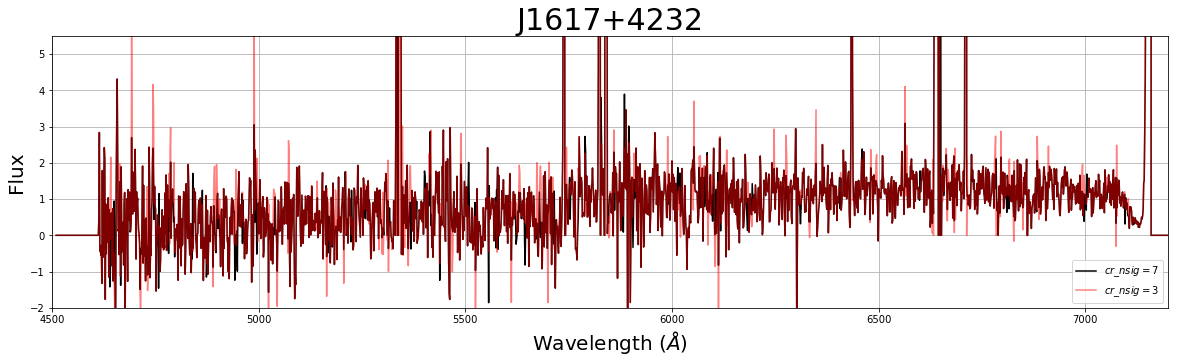

In [37]:
plt.figure(figsize=[20,5])
plt.grid()
plt.xlabel('Wavelength ($\AA$)', fontsize = 20)
plt.ylabel('Flux' , fontsize = 20)
plt.title('J1617+4232', fontsize = 30)
# plot between 4500-7200A
plt.xlim(4500. , 7200.)
plt.ylim(-2.0 , 5.5)
plt.plot(wav1_def , flux1_def, color = 'k' , label = '$cr\_nsig = 7$')
plt.plot(wav1 , flux1 , color = 'red', alpha=.5, label = '$cr\_nsig = 3$')
plt.legend(loc=4)

Even with the lower value of cr_nsig, we still get the large deviations in the unbinned spectrum. Should try to attack the problem earlier in the reduction.

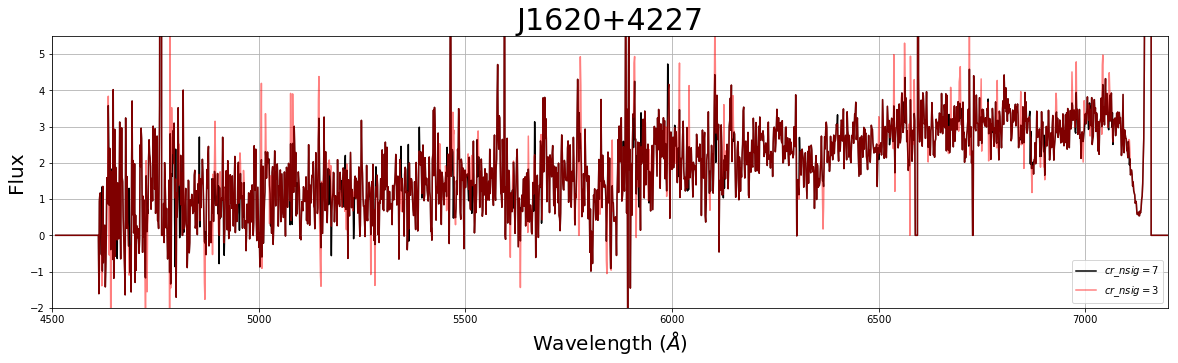

In [38]:
plt.figure(figsize=[20,5])
plt.grid()
plt.xlabel('Wavelength ($\AA$)', fontsize = 20)
plt.ylabel('Flux' , fontsize = 20)
plt.title('J1620+4227', fontsize = 30)
# plot between 4500-7200A
plt.xlim(4500. , 7200.)
plt.ylim(-2.0 , 5.5)
plt.plot(wav2_def , flux2_def, color = 'k' , label = '$cr\_nsig = 7$')
plt.plot(wav2 , flux2 , color = 'red', alpha=.5, label = '$cr\_nsig = 3$')
plt.legend(loc=4)

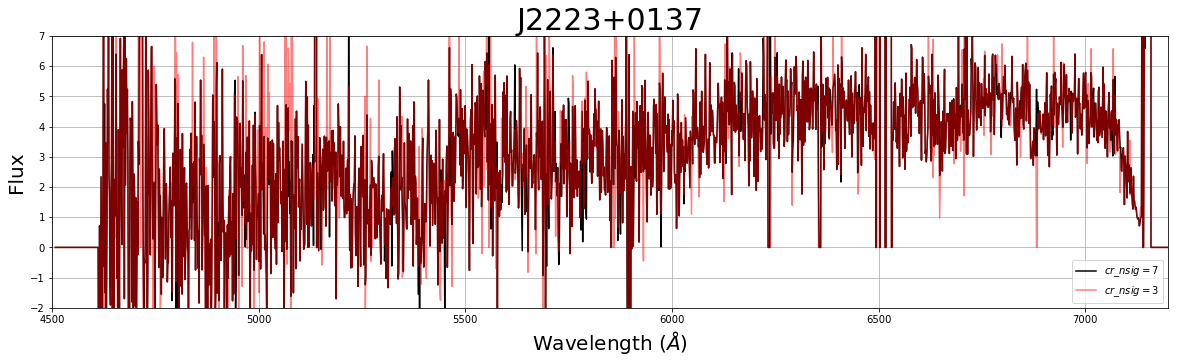

In [39]:
plt.figure(figsize=[20,5])
plt.grid()
plt.xlabel('Wavelength ($\AA$)', fontsize = 20)
plt.ylabel('Flux' , fontsize = 20)
plt.title('J2223+0137', fontsize = 30)
# plot between 4500-7200A
plt.xlim(4500. , 7200.)
plt.ylim(-2.0 , 7.0)
plt.plot(wav3_def , flux3_def, color = 'k' , label = '$cr\_nsig = 7$')
plt.plot(wav3 , flux3 , color = 'red', alpha=.5, label = '$cr\_nsig = 3$')
plt.legend(loc=4)

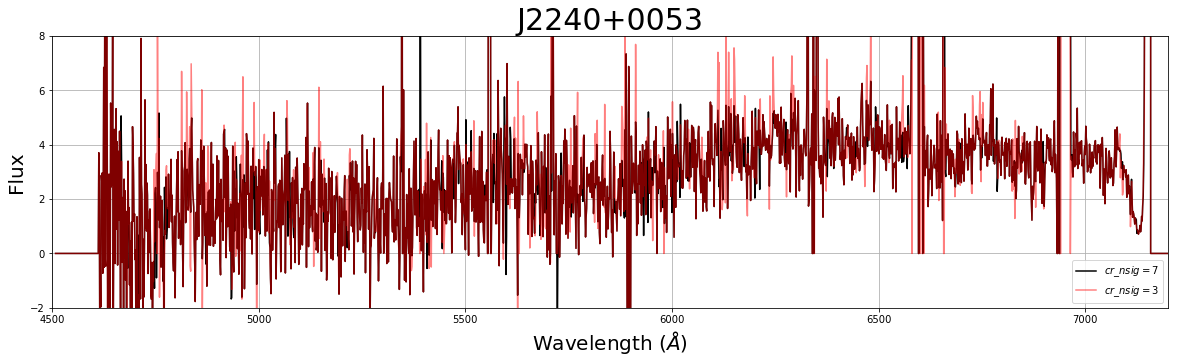

In [45]:
plt.figure(figsize=[20,5])
plt.grid()
plt.xlabel('Wavelength ($\AA$)', fontsize = 20)
plt.ylabel('Flux' , fontsize = 20)
plt.title('J2240+0053', fontsize = 30)
# plot between 4500-7200A
plt.xlim(4500. , 7200.)
plt.ylim(-2.0 , 8.0)
plt.plot(wav4_def , flux4_def, color = 'k' , label = '$cr\_nsig = 7$')
plt.plot(wav4 , flux4 , color = 'red', alpha=.5, label = '$cr\_nsig = 3$')
plt.legend(loc=4)

One thing that I do notice is that during the coaddition, pypit says it is "masking bad flux values" and setting them to zero. This might also be where the nasty spikes come from. For example, if I plot the binned/smoothed version of the above spectrum, the gaps should coincide. The most distinct is around ~6900A in the above.

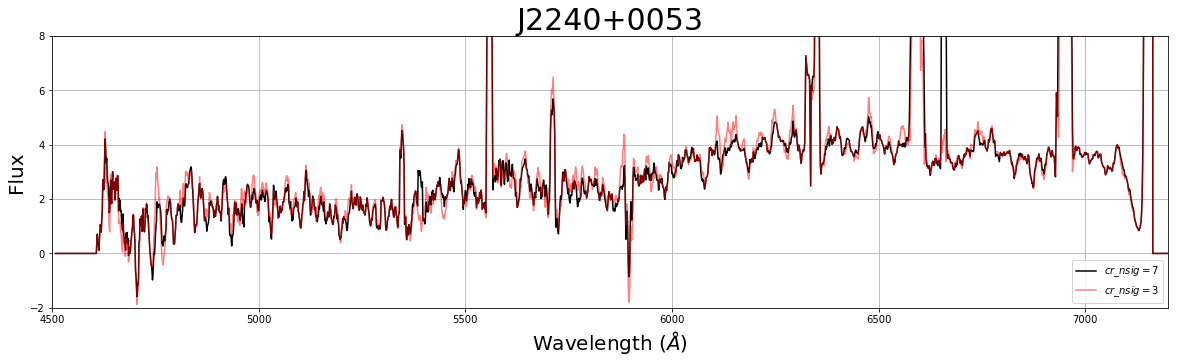

In [44]:
# Using Song's code for smoothed spect from astropy.convolution
plt.figure(figsize=[20,5])
plt.grid()
plt.xlabel('Wavelength ($\AA$)', fontsize = 20)
plt.ylabel('Flux' , fontsize = 20)
plt.title('J2240+0053', fontsize = 30)
plt.xlim(4500. , 7200.)
plt.ylim(-2.0 , 8.0)
plt.plot(wav4_def, convolve(flux4_def, Box1DKernel(9)), color='k', 
         label='$cr\_nsig = 7$')
plt.plot(wav4, convolve(flux4, Box1DKernel(9)), color='red',alpha= .5, 
         label='$cr\_nsig = 3$')
plt.legend(loc=4)